# Préparation du dataset v1

Ce dataset gardera toutes les colonnes de la table principal application train ainsi que de nouvelles colonnes venant d'autres tables. 

In [1]:
import pandas as pd
import numpy as np
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import os
# ajout du chemin src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path: sys.path.append(project_root)
from src.data_prep import load_and_feature_engineering, reduce_mem_usage, missing_values_table

In [2]:
# visualisation des fichier data
print(os.listdir("../data/raw/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# Cela appelle notre fonction .py qui fait les ratios + les jointures "light"
df = load_and_feature_engineering()

Base Train chargée: (307511, 122)
Après get_bureau_features: (307511, 139)
Après get_previous_features: (307511, 142)
Après get_pos_cash_features: (307511, 145)
Après get_installments_features: (307511, 156)
Après get_credit_card_features: (307511, 159)
--- Terminé ---


In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,INSTAL_PAYMENT_PERC_VAR,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DPD_FLAG_MEAN,CC_AMT_BALANCE_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_SK_DPD_MAX
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,0.0,0.000000,0.0,31.0,20.421053,0.000000,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,0.0,0.000000,0.0,14.0,7.160000,0.000000,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,0.0,0.000000,0.0,11.0,7.666667,0.000000,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.000000,0.0,0.000000,0.0,77.0,19.375000,0.000000,0.0,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.043995,12.0,0.954545,63.0,31.0,4.590909,0.242424,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 159 entries, SK_ID_CURR to CC_SK_DPD_MAX
dtypes: float64(102), int64(41), object(16)
memory usage: 373.0+ MB


In [6]:
# Réduction de la taille mémoire
df = reduce_mem_usage(df)

Usage mémoire initial du DataFrame: 373.03 MB
Usage mémoire final du DataFrame: 121.12 MB
Mémoire réduite de 67.5 %


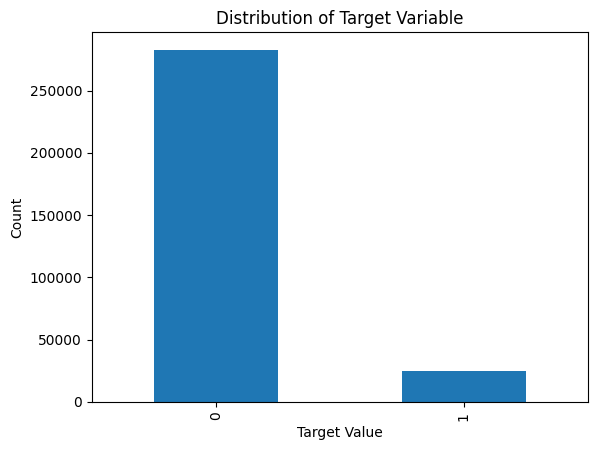

<Figure size 640x480 with 0 Axes>

In [7]:
# Visualisation de la distribution de la variable cible
df['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()
# sauvegarde de la figure
plt.savefig('../reports/figures/target_distribution.png')

Ce graphique nous montre la distribution de la variable cible. on voit ici qu'il y a un enorme désiquilibre entre les oui et non pour l'accord du crédit. il faudra en tenir compte dans notre split de données et dans les modeles.

In [8]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(40)

Your selected dataframe has 159 columns.
There are 102 columns that have missing values.


,Missing Values,% of Total Values
CC_AMT_DRAWINGS_ATM_CURRENT_MEAN,246371,80.1
CC_AMT_BALANCE_MEAN,220606,71.7
CC_SK_DPD_MAX,220606,71.7
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4


On voit que 86 des 143 colonnes ont des valeurs null et 40 d'entre elles ont plus de 50% de valeurs null. Les modeles comme lightGBM savent normalement traiter ces valeurs donc nous allons les garder.

In [9]:
#On enleve l'id et on le met en index pour ne pas le prendre en compte
if 'SK_ID_CURR' in df.columns:
    df.set_index('SK_ID_CURR', inplace=True) 

#on enleve aussi target des features d'entrainement
y = df['TARGET']
X = df.drop(columns=['TARGET'])
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (307511, 157)
Shape y: (307511,)


In [10]:
# On encode avec get_dummies (One-Hot encoding)
X = pd.get_dummies(X, dummy_na=True) # dummy_na=True crée une colonne "Nan" si la valeur manque 

print(f"Shape X après encodage : {X.shape}")

Shape X après encodage : (307511, 297)


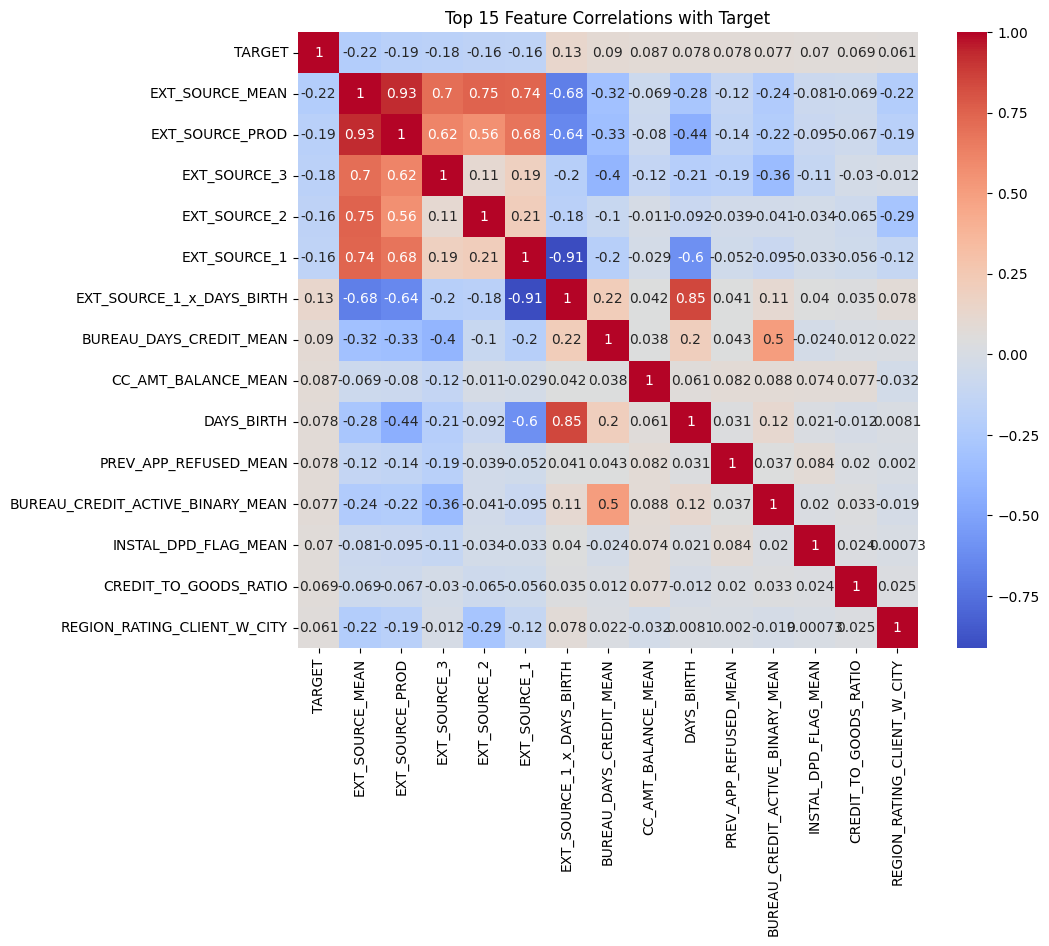

<Figure size 640x480 with 0 Axes>

In [11]:
# Calcul de la corrélation 
correlations = df.select_dtypes(include=[np.number]).corr()['TARGET'].sort_values()

# matrice de corrélation top 15
plt.figure(figsize=(10, 8))
top_corr_features = correlations.abs().sort_values(ascending=False).head(15).index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top 15 Feature Correlations with Target')
plt.show()
# sauvegarde de la figure
plt.savefig('../reports/figures/top_15_feature_correlations.png')

In [15]:
# Correction Outliers (Revenu et Jours travaillés) 
df = df[df['AMT_INCOME_TOTAL'] < 100000000] # Vire le 117M
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
# en gros le days employed se fait a partir du jours ou on a demandé le pret donc si c'est positif c'est que c'est dans le futur donc on vire aussi.

1. Check Infinis : 0 valeurs infinies détectées

2. Top 10 des colonnes vides (%)
CC_AMT_DRAWINGS_ATM_CURRENT_MEAN    80.117720
CC_AMT_BALANCE_MEAN                 71.739130
CC_SK_DPD_MAX                       71.739130
COMMONAREA_MODE                     69.872199
COMMONAREA_AVG                      69.872199
COMMONAREA_MEDI                     69.872199
NONLIVINGAPARTMENTS_AVG             69.432864
NONLIVINGAPARTMENTS_MODE            69.432864
NONLIVINGAPARTMENTS_MEDI            69.432864
FONDKAPREMONT_MODE                  68.386069
dtype: float64

3. Vérification des Outliers Métier
Revenu Max : 18,000,090
Jours Travaillés Max (devrait être <= 0) : 0.0


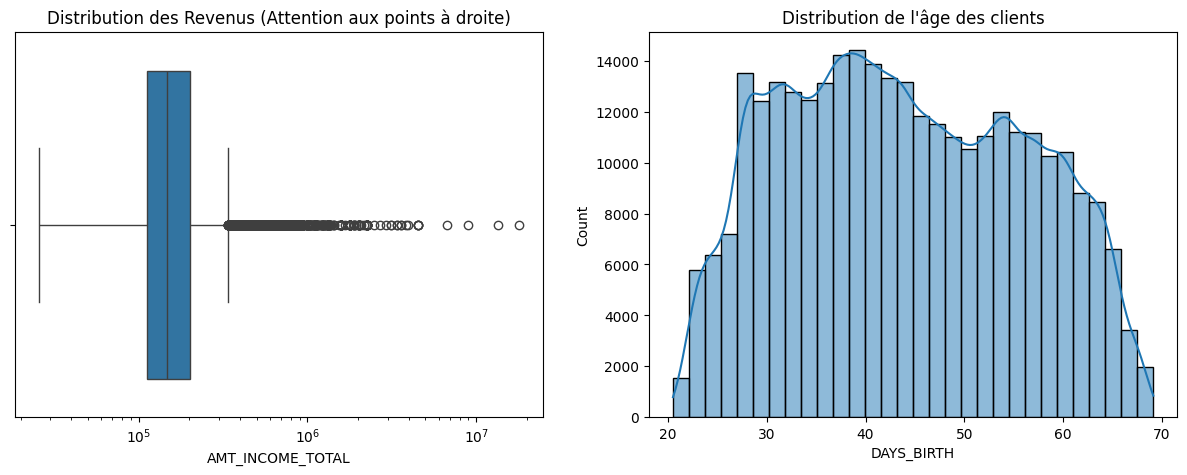

In [16]:
# ANALYSE SANTÉ DU DATASET

# 1. Vérification des Infinis si on divise par 0, ça crée 'inf'
# On ne regarde que les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(df[numeric_cols]).sum().sum()

print(f"1. Check Infinis : {inf_count} valeurs infinies détectées")
if inf_count > 0:
    # Affiche les colonnes coupables
    cols_with_inf = [col for col in numeric_cols if np.isinf(df[col]).sum() > 0]
    print(f"Colonnes concernées : {cols_with_inf}")
    # Correction simple : on remplace inf par NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    print("Correction appliquée : inf -> NaN")

# 2. Vérification des Valeurs Manquantes (Top 10)
print("\n2. Top 10 des colonnes vides (%)")
missing_perc = (df.isnull().sum() / len(df)) * 100
print(missing_perc.sort_values(ascending=False).head(10))

# 3. Détection des Outliers (Revenus et Emploi)
print("\n3. Vérification des Outliers Métier")
# A. Revenus
print(f"Revenu Max : {df['AMT_INCOME_TOTAL'].max():,.0f}")
if df['AMT_INCOME_TOTAL'].max() > 20000000:
    print("ALERTE : Il y a des revenus > 20 Millions. À vérifier !")

# B. Jours Travaillés (Le bug des 1000 ans, soit 365243 jours)
print(f"Jours Travaillés Max (devrait être <= 0) : {df['DAYS_EMPLOYED'].max()}")

# 4. Visualisation Boxplot
plt.figure(figsize=(15, 5))

# Distribution des Revenus (Log scale pour mieux voir)
plt.subplot(1, 2, 1)
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.title('Distribution des Revenus (Attention aux points à droite)')
plt.xscale('log') # On met en log car les écarts sont énormes

# Distribution de l'âge (en années)
plt.subplot(1, 2, 2)
sns.histplot(df['DAYS_BIRTH'] / -365, bins=30, kde=True)
plt.title("Distribution de l'âge des clients")

plt.show()

In [13]:
# Gestion des valeurs manquantes. pour le moment on fait rien car lightGBM est sencé les géré on verra si necessaire apres

# for col in X.select_dtypes(include=np.number):
#     X[col] = X[col].fillna(X[col].median())


In [17]:
# On sauvegarde en format Pickle (beaucoup plus rapide que CSV et garde les types de données)
X.to_pickle('../data/processed/X_prepared_v1.pkl')
y.to_pickle('../data/processed/y_prepared_v1.pkl')